In [4]:
# Module importieren
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import numpy as np

# LO1: Performance

In [15]:
# Create list with 100000 random numbers
random_list = np.random.randint(0, 1000, 100000)
# Create list with 100000 random numbers
random_list2 = np.random.randint(0, 1000, 100000)

15 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


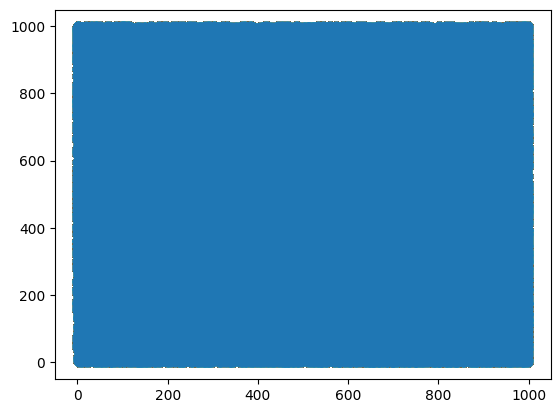

In [6]:
# scatter plot and measure time
%timeit plt.scatter(random_list, random_list2)

# LO2: Dashboard design principles

### Brushing and linking

In [7]:
# Module importieren
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource

# x und y für beide Grafiken definieren
x = np.arange(0,21,1)
y1 = x
y2 = -x
source = ColumnDataSource(data= dict(x=x, y1=y1, y2=y2))

# Grafik 1
positiv = figure(tools='lasso_select,box_select', width=400, height=400)
positiv.circle(x="x", y="y1", size=10, color="pink", source=source)
positiv.title.text = "0 - 20 Y-axis positive"

# Grafik 2
negativ = figure(tools='lasso_select,box_select',width=400, height=400)
negativ.circle(x="x", y="y2", size=10, color="forestgreen", source=source)
negativ.title.text = "0 - 20 Y-axis negative"

plot = gridplot([[positiv, negativ]])
show(plot)

### Zoom and filter

In [8]:
# Daten einlesen
data = pd.read_excel("datasetswissvotes.xlsx",sheet_name=1)

In [9]:
# Datum Spalte als datatype Datum speichern
data["datum"] = pd.to_datetime(data["datum"])

/var/folders/tc/0z__rljx2754mhb2y8pn92mh0000gn/T/ipykernel_6351/3273161268.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["datum"] = pd.to_datetime(data["datum"])


In [10]:
# Dataset erstellen ab 01.01.1879 (benötigte Daten erst ab dann verfügbar)
dataseit1879 = data[data["datum"] >= "01.01.1879"]

In [11]:
# Spaltennahmen und Inhalt anpassen
dataseit1879["annahme"] = dataseit1879["annahme"].replace([0], "Rejection")
dataseit1879["annahme"] = dataseit1879["annahme"].replace([1], "Acceptance")
dataseit1879["annahme"] = dataseit1879["annahme"].replace(["."], "Obsolet")

/var/folders/tc/0z__rljx2754mhb2y8pn92mh0000gn/T/ipykernel_6351/3494018509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataseit1879["annahme"] = dataseit1879["annahme"].replace([0], "Rejection")
/var/folders/tc/0z__rljx2754mhb2y8pn92mh0000gn/T/ipykernel_6351/3494018509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataseit1879["annahme"] = dataseit1879["annahme"].replace([1], "Acceptance")
/var/folders/tc/0z__rljx2754mhb2y8pn92mh0000gn/T/ipykernel_6351/3494018509.py:4: SettingWithCopyWarning: 

In [12]:
# Plot erstellen
fig = px.scatter(dataseit1879, x="datum", y="bet", color="annahme",size="volkja-proz",
    labels={"datum":"Year",
    "bet":"Voter participation",
    "annahme":"Result",
    "volkja-proz":"Prozentualer Anteil Ja-Stimmen"},
    title = "Votes since 01.01.1879",
color_discrete_sequence= ["forestgreen", "pink", "gray"],
                )
fig.show()

# LO3: HCI Basics

### Animated transitions

In [13]:
# Daten einlesen
# quelle : https://opendata.swiss/en/dataset/covid-19-schweiz/resource/ce8c184f-e1fb-4adf-b0a2-c1bc9ec8471a
data2 = pd.read_csv("PopulationAgeRangeSexData.csv")

# Neuen Datensatz ohne CH / FL / CHFL erstellen
data2 = data2[(data2["geoRegion"]!="CH") & (data2["geoRegion"] !="CHFL") & (data2["geoRegion"] != "FL")]

In [14]:
# Grafik erstellen
fig = px.bar(data2, x='ageRange', y="pop", color="ageRange",
  animation_frame="geoRegion", animation_group="ageRange", range_y=[3, 130000],
             labels={"pop":"Population",
            "ageRange":"Age group",
            "geoRegion": "Canton"},
             title='Population per canton divided by age groups')

fig.show()